<a href="https://colab.research.google.com/github/hamk3010/DeepLearning/blob/master/ML-Algos/Linear-Regression%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent on Linear Regression with Scikit-Learn 
## Batch Gradient Descent
(Play around with the learning rates to see how the convergence rate varies)

[[3.8351989 ]
 [3.02313433]]


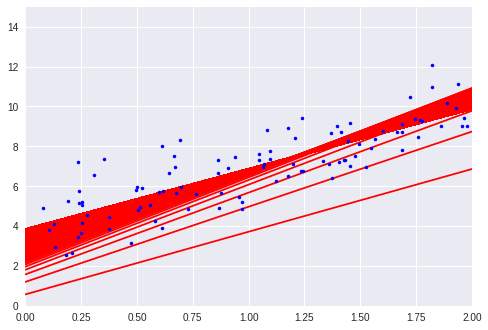

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = 2* np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)
X_b = np.c_[np.ones((100,1)), X]


eta = 0.1 #learning rate 
n_iterations = 1000
m= 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y )
  theta = theta - eta*gradients
  X_new = np.array([[0],[2]])
  X_new_b = np.c_[np.ones((2,1)), X_new]
  y_pred = X_new_b.dot(theta)
  plt.plot(X_new, y_pred, "r-")
  
print(theta)


plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

##Stochastic Gradient Descent (SGD)
Stochastic Gradient Descent picks a random instance in the training set at every step and computes the gradients based only on that single instance unlike Batch Gradient Descent which uses the whole training set to compute the gradient. 

However due to SGD's stochastic (random) behavior the cost function will bounce up and down, decreasing only on average but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal. 



[[3.82917178]
 [3.0253215 ]]


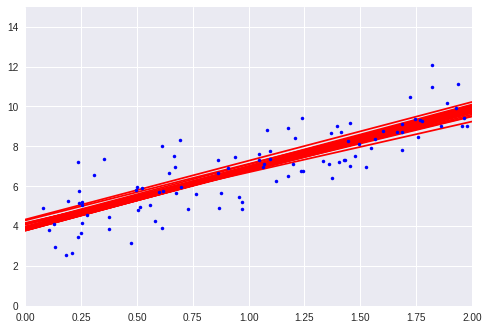

In [9]:
# Below we will implement Stochastic Gradient Descent while gradually decreasing
# the learning rate as the algorithm progresses

n_epochs = 50
t0, t1 = 5 , 50 

def learning_schedule(t):
  return t0/ (t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index: random_index+1]
    yi = y[random_index: random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch*m + i)
    theta = theta - eta* gradients
  
  X_new = np.array([[0],[2]])
  X_new_b = np.c_[np.ones((2,1)), X_new]
  y_pred = X_new_b.dot(theta)
  plt.plot(X_new, y_pred, "r-")

print(theta)
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()




### Using Sci-kit Learn's *SGDRegressor* class


In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 50, penalty = None, eta0=0.1, tol = None)
sgd_reg.fit(X, y.ravel() )

print(sgd_reg.intercept_, sgd_reg.coef_)

[3.79784532] [2.96316387]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


##Mini-batch Gradient Descent
At each step, Mini-Batch Gradient Descent instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini batch GD computes the gradients on small random sets of instances called mini-batches.



#Polynomial Regression
A linear model can be used to fit non-linear data . We can just add powers of each feature as new features, then train a linear model on this extended feature set.



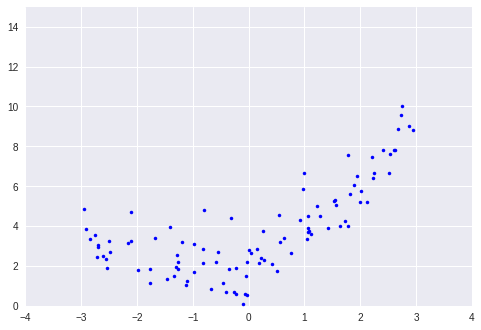

In [19]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X,y, "b.")
plt.axis([-4,4,0,15])
plt.show()

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)
#  X_poly will now contain X and its square
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])


[-0.79938623]
[-0.79938623  0.63901834]


[2.34829131] [[0.93815559 0.48367568]]


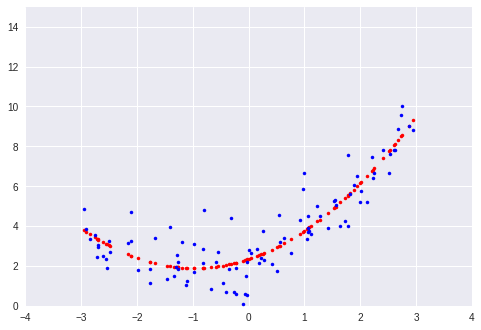

In [82]:
#  Now we will use the sklearn linear regression function to fit the data above
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

# X_new = np.array([[-4],[4]])
# X_new_b = np.c_[np.ones((2,1)), X_new]
y_pred = lin_reg.predict(X_poly )
plt.plot(X , y_pred , "r.")
plt.plot(X,y, "b.")
plt.axis([-4,4,0,15])
plt.show()

## Learning Curves
Below we will build a learning curve. We will simply train the model several times on different sized subsets of the training set. 

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X,y, test_size= 0.2)
  train_errors, val_errors = [], []
  
  for m in range(1, len(X_train) ):
    model.fit(X_train[:m], y_train[:m] )
    # train the part of the model and predict the part it was trained on
    y_train_predict = model.predict(X_train[:m])
    # predict the part the model hasn't seen
    y_val_predict = model.predict(X_val)
    # Calculate the error between the predicted and the trained data
    train_errors.append( mean_squared_error( y_train_predict, y_train[:m] ) )
    # Calculate the error on the validated data
    val_errors.append( mean_squared_error( y_val_predict, y_val ) )
  
  # Plot the errors you found on the two sets and the partially trained models
  # Graph them w.r.t the size training set size
  Training_Set, = plt.plot( np.sqrt(train_errors), "r-+", 
                          linewidth=2, label= "Training Set")
  Validation_Set, = plt.plot( np.sqrt(val_errors), "b-", 
                            linewidth= 3, label = "Validation Set")
  plt.xlabel("Training set size")
  plt.ylabel("RMSE")
  plt.legend(handles=[Training_Set, Validation_Set])
    


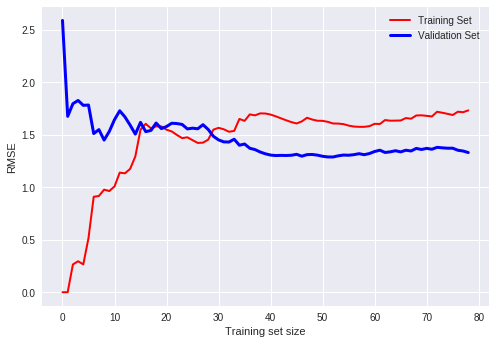

In [98]:
lin_reg = LinearRegression()
plot_learning_curves( lin_reg, X, y) 